# Based on: [ "10 minutes to pandas"](https://pandas.pydata.org/docs/user_guide/10min.html)

In [1]:
import pandas as pd
import numpy as np

# 1. Object Creation

## 1.1 Creating a Series

You can create a `Series` from an **array-like**, **iterable**, `dict`, or **scalar** value.

In [2]:
# Create a Series from a list
l = [1, 2, 3, "a", "b", "c", "", np.nan]
series_from_list = pd.Series(l, name="series_from_list")

# Create a Series from a NumPy array:
arr = np.random.rand(8)
series_from_array = pd.Series(arr, name="series_from_array")

# Create a Series from a dict
d = dict(enumerate(l))
series_from_dict = pd.Series(d, name="series_from_dict")

# Create a Series from a scalar
series_from_scalar = pd.Series(1, name="scalar")

# Putting it all together for comparison
pd.concat(
    [series_from_list, series_from_array, series_from_dict, series_from_scalar],
    axis=1
)

,series_from_list,series_from_array,series_from_dict,scalar
0,1,0.010314,1,1.0
1,2,0.920400,2,NaN
2,3,0.575284,3,NaN
3,a,0.073780,a,NaN
4,b,0.338588,b,NaN
5,c,0.004423,c,NaN
6,,0.258088,,NaN
7,NaN,0.429294,NaN,NaN


## 1.2 Creating a Dataframe

You can create a `DataFrame` from an **ndarray**, **iterable** or `dict`.

In [3]:
# Create a DataFrame from a dict
df = pd.DataFrame(
    {
        "A": 1.,
        "B": pd.Timestamp("2021-06-24"),
        "C": pd.Series(np.random.rand(4), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train"] * 2),
        "F": "foo"
    },
)
df

,A,B,C,D,E,F
0,1.0,2021-06-24,0.634692,3,test,foo
1,1.0,2021-06-24,0.061173,3,train,foo
2,1.0,2021-06-24,0.144250,3,test,foo
3,1.0,2021-06-24,0.694999,3,train,foo


In [4]:
# Checking data types 
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [5]:
# Create a DataFrame from a NumPy array
df = pd.DataFrame(
    np.random.randn(8, 4),
    columns=list("ABCD"),
    index=pd.date_range("2021-06-24", periods=8)
) 
df

,A,B,C,D
2021-06-24,0.288673,-0.673801,1.879158,1.524460
2021-06-25,0.251111,-1.445010,2.420411,-0.917394
2021-06-26,0.960646,0.956689,-1.042411,0.721923
2021-06-27,-0.153872,-0.004044,2.055821,1.058809
2021-06-28,0.304945,1.592066,-0.714421,-1.172554
2021-06-29,0.561913,-0.600785,1.750463,-1.034171
2021-06-30,-1.664235,0.541949,0.229058,0.765287
2021-07-01,-0.966825,0.560971,-1.256437,0.102291


# 2. Viewing Data

In [6]:
# View the top n values
df.head(n=3)

,A,B,C,D
2021-06-24,0.288673,-0.673801,1.879158,1.524460
2021-06-25,0.251111,-1.445010,2.420411,-0.917394
2021-06-26,0.960646,0.956689,-1.042411,0.721923


In [7]:
# View the bottom n values
df.tail()  # default n=5

,A,B,C,D
2021-06-27,-0.153872,-0.004044,2.055821,1.058809
2021-06-28,0.304945,1.592066,-0.714421,-1.172554
2021-06-29,0.561913,-0.600785,1.750463,-1.034171
2021-06-30,-1.664235,0.541949,0.229058,0.765287
2021-07-01,-0.966825,0.560971,-1.256437,0.102291


In [8]:
# View the index
df.index

DatetimeIndex(['2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
               '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# View the columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [10]:
# Get summary statistics
df.describe()

,A,B,C,D
count,8.000000,8.000000,8.000000,8.000000
mean,-0.052206,0.116004,0.665205,0.131081
std,0.860587,0.989494,1.529158,1.049551
min,-1.664235,-1.445010,-1.256437,-1.172554
25%,-0.357110,-0.619039,-0.796419,-0.946588
50%,0.269892,0.268952,0.989760,0.412107
75%,0.369187,0.659901,1.923324,0.838668
max,0.960646,1.592066,2.420411,1.524460


In [11]:
# Transpose a DataFrame
df.T

,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01
A,0.288673,0.251111,0.960646,-0.153872,0.304945,0.561913,-1.664235,-0.966825
B,-0.673801,-1.445010,0.956689,-0.004044,1.592066,-0.600785,0.541949,0.560971
C,1.879158,2.420411,-1.042411,2.055821,-0.714421,1.750463,0.229058,-1.256437
D,1.524460,-0.917394,0.721923,1.058809,-1.172554,-1.034171,0.765287,0.102291


# 3. Sorting Data

### 3.1 Sort by axis

In [12]:
# Sort rows in descending order 
df.sort_index(ascending=False)  # default axis=0

,A,B,C,D
2021-07-01,-0.966825,0.560971,-1.256437,0.102291
2021-06-30,-1.664235,0.541949,0.229058,0.765287
2021-06-29,0.561913,-0.600785,1.750463,-1.034171
2021-06-28,0.304945,1.592066,-0.714421,-1.172554
2021-06-27,-0.153872,-0.004044,2.055821,1.058809
2021-06-26,0.960646,0.956689,-1.042411,0.721923
2021-06-25,0.251111,-1.445010,2.420411,-0.917394
2021-06-24,0.288673,-0.673801,1.879158,1.524460


In [13]:
# Sort columns in descending order
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-06-24,1.524460,1.879158,-0.673801,0.288673
2021-06-25,-0.917394,2.420411,-1.445010,0.251111
2021-06-26,0.721923,-1.042411,0.956689,0.960646
2021-06-27,1.058809,2.055821,-0.004044,-0.153872
2021-06-28,-1.172554,-0.714421,1.592066,0.304945
2021-06-29,-1.034171,1.750463,-0.600785,0.561913
2021-06-30,0.765287,0.229058,0.541949,-1.664235
2021-07-01,0.102291,-1.256437,0.560971,-0.966825


### 3.2 Sort by value

In [14]:
# Sort rows in ascending order by values in column B
df.sort_values(by="B")  # default ascending=True

,A,B,C,D
2021-06-25,0.251111,-1.445010,2.420411,-0.917394
2021-06-24,0.288673,-0.673801,1.879158,1.524460
2021-06-29,0.561913,-0.600785,1.750463,-1.034171
2021-06-27,-0.153872,-0.004044,2.055821,1.058809
2021-06-30,-1.664235,0.541949,0.229058,0.765287
2021-07-01,-0.966825,0.560971,-1.256437,0.102291
2021-06-26,0.960646,0.956689,-1.042411,0.721923
2021-06-28,0.304945,1.592066,-0.714421,-1.172554


In [15]:
# Sort columns in descending order by values in row index "2021-06-25"
df.sort_values(by="2021-06-25", axis=1, ascending=False)

,C,A,D,B
2021-06-24,1.879158,0.288673,1.524460,-0.673801
2021-06-25,2.420411,0.251111,-0.917394,-1.445010
2021-06-26,-1.042411,0.960646,0.721923,0.956689
2021-06-27,2.055821,-0.153872,1.058809,-0.004044
2021-06-28,-0.714421,0.304945,-1.172554,1.592066
2021-06-29,1.750463,0.561913,-1.034171,-0.600785
2021-06-30,0.229058,-1.664235,0.765287,0.541949
2021-07-01,-1.256437,-0.966825,0.102291,0.560971


# 4. Selection

### 4.1 Getting

In [16]:
# Get a column from a DataFrame (returns a Series)
df["A"]

2021-06-24    0.288673
2021-06-25    0.251111
2021-06-26    0.960646
2021-06-27   -0.153872
2021-06-28    0.304945
2021-06-29    0.561913
2021-06-30   -1.664235
2021-07-01   -0.966825
Freq: D, Name: A, dtype: float64

In [17]:
# Get a subset of the rows
df["2021-06-25":"2021-06-28"]

,A,B,C,D
2021-06-25,0.251111,-1.445010,2.420411,-0.917394
2021-06-26,0.960646,0.956689,-1.042411,0.721923
2021-06-27,-0.153872,-0.004044,2.055821,1.058809
2021-06-28,0.304945,1.592066,-0.714421,-1.172554


### 4.2 Selection by label

In [18]:
# Select a row (cross section)
df.loc["2021-06-25"]

A    0.251111
B   -1.445010
C    2.420411
D   -0.917394
Name: 2021-06-25 00:00:00, dtype: float64

In [19]:
# Select columns "A" and "C"
df.loc[:, ["A", "C"]]

,A,C
2021-06-24,0.288673,1.879158
2021-06-25,0.251111,2.420411
2021-06-26,0.960646,-1.042411
2021-06-27,-0.153872,2.055821
2021-06-28,0.304945,-0.714421
2021-06-29,0.561913,1.750463
2021-06-30,-1.664235,0.229058
2021-07-01,-0.966825,-1.256437


In [20]:
# Multi-axis selection by label
df.loc["2021-06-28":"2021-06-30", ["B", "D"]]

,B,D
2021-06-28,1.592066,-1.172554
2021-06-29,-0.600785,-1.034171
2021-06-30,0.541949,0.765287


In [21]:
# Select a scalar value by label
df.at["2021-06-29", "B"]

-0.6007850314317551

### 4.3 Selection by position

In [22]:
# Select the 3rd row (the index is zero-based: 0, 1, 2, 3, ...)
df.iloc[2]

A    0.960646
B    0.956689
C   -1.042411
D    0.721923
Name: 2021-06-26 00:00:00, dtype: float64

In [23]:
# Multi-axis selection by position using slice notation
df.iloc[3:5, 2:4]

,C,D
2021-06-27,2.055821,1.058809
2021-06-28,-0.714421,-1.172554


In [24]:
# Multi-axis selection by position using lists of indices
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-06-25,0.251111,2.420411
2021-06-26,0.960646,-1.042411
2021-06-28,0.304945,-0.714421


In [25]:
# Select a scalar value by position
df.iat[2, 2]

-1.042410629387023

### 4.4 Boolean indexing

In [26]:
# Select positive values
df[df > 0]

,A,B,C,D
2021-06-24,0.288673,NaN,1.879158,1.524460
2021-06-25,0.251111,NaN,2.420411,NaN
2021-06-26,0.960646,0.956689,NaN,0.721923
2021-06-27,NaN,NaN,2.055821,1.058809
2021-06-28,0.304945,1.592066,NaN,NaN
2021-06-29,0.561913,NaN,1.750463,NaN
2021-06-30,NaN,0.541949,0.229058,0.765287
2021-07-01,NaN,0.560971,NaN,0.102291


In [27]:
# Select rows in which values in column "B" are positive
df[df["B"] > 0]

,A,B,C,D
2021-06-26,0.960646,0.956689,-1.042411,0.721923
2021-06-28,0.304945,1.592066,-0.714421,-1.172554
2021-06-30,-1.664235,0.541949,0.229058,0.765287
2021-07-01,-0.966825,0.560971,-1.256437,0.102291


In [28]:
# Add column "E"
df["E"] = ["one", "one", "two", "three", "four", "three", "two", "four"]

# Select using the isin() method
df[df["E"].isin(["two", "four"])]

,A,B,C,D,E
2021-06-26,0.960646,0.956689,-1.042411,0.721923,two
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,four
2021-06-30,-1.664235,0.541949,0.229058,0.765287,two
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,four


### 4.5 Setting

In [29]:
# Set a new column "F"
df["F"] = range(1, 9)
df

,A,B,C,D,E,F
2021-06-24,0.288673,-0.673801,1.879158,1.524460,one,1
2021-06-25,0.251111,-1.445010,2.420411,-0.917394,one,2
2021-06-26,0.960646,0.956689,-1.042411,0.721923,two,3
2021-06-27,-0.153872,-0.004044,2.055821,1.058809,three,4
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,four,5
2021-06-29,0.561913,-0.600785,1.750463,-1.034171,three,6
2021-06-30,-1.664235,0.541949,0.229058,0.765287,two,7
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,four,8


In [30]:
# Set new values for a column
df.loc[:, "E"] = df["E"].str.upper()
df

,A,B,C,D,E,F
2021-06-24,0.288673,-0.673801,1.879158,1.524460,ONE,1
2021-06-25,0.251111,-1.445010,2.420411,-0.917394,ONE,2
2021-06-26,0.960646,0.956689,-1.042411,0.721923,TWO,3
2021-06-27,-0.153872,-0.004044,2.055821,1.058809,THREE,4
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,FOUR,5
2021-06-29,0.561913,-0.600785,1.750463,-1.034171,THREE,6
2021-06-30,-1.664235,0.541949,0.229058,0.765287,TWO,7
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,FOUR,8


In [31]:
# Set values by position
df.iat[2, 2] = 2200

# Set values by label
df.at["2021-06-26", "D"] = 2300

df

,A,B,C,D,E,F
2021-06-24,0.288673,-0.673801,1.879158,1.524460,ONE,1
2021-06-25,0.251111,-1.445010,2.420411,-0.917394,ONE,2
2021-06-26,0.960646,0.956689,2200.000000,2300.000000,TWO,3
2021-06-27,-0.153872,-0.004044,2.055821,1.058809,THREE,4
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,FOUR,5
2021-06-29,0.561913,-0.600785,1.750463,-1.034171,THREE,6
2021-06-30,-1.664235,0.541949,0.229058,0.765287,TWO,7
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,FOUR,8


# 5. Missing Data

`pandas` primarily uses the value `np.nan` to represent *missing data*. It is by default not included in computations.

In [32]:
# Adding some NaN values (the default representation for missing data)
df.loc["2021-06-25":"2021-06-27", "A":"C"] = np.nan
df["G"] = np.nan
df

,A,B,C,D,E,F,G
2021-06-24,0.288673,-0.673801,1.879158,1.524460,ONE,1,NaN
2021-06-25,NaN,NaN,NaN,-0.917394,ONE,2,NaN
2021-06-26,NaN,NaN,NaN,2300.000000,TWO,3,NaN
2021-06-27,NaN,NaN,NaN,1.058809,THREE,4,NaN
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,FOUR,5,NaN
2021-06-29,0.561913,-0.600785,1.750463,-1.034171,THREE,6,NaN
2021-06-30,-1.664235,0.541949,0.229058,0.765287,TWO,7,NaN
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,FOUR,8,NaN


### 5.1 Dropping missing data

In [33]:
# Drop rows missing values for columns "A" & "C"
df.dropna(subset=["A", "C"])  # default axis=0, how="any"

,A,B,C,D,E,F,G
2021-06-24,0.288673,-0.673801,1.879158,1.524460,ONE,1,NaN
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,FOUR,5,NaN
2021-06-29,0.561913,-0.600785,1.750463,-1.034171,THREE,6,NaN
2021-06-30,-1.664235,0.541949,0.229058,0.765287,TWO,7,NaN
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,FOUR,8,NaN


In [34]:
# Drop empty columns
df.dropna(axis=1, how="all")

,A,B,C,D,E,F
2021-06-24,0.288673,-0.673801,1.879158,1.524460,ONE,1
2021-06-25,NaN,NaN,NaN,-0.917394,ONE,2
2021-06-26,NaN,NaN,NaN,2300.000000,TWO,3
2021-06-27,NaN,NaN,NaN,1.058809,THREE,4
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,FOUR,5
2021-06-29,0.561913,-0.600785,1.750463,-1.034171,THREE,6
2021-06-30,-1.664235,0.541949,0.229058,0.765287,TWO,7
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,FOUR,8


### 5.2 Filling missing values

In [35]:
# Fill in missing values with a specific value
df.fillna(value=0.11111)

,A,B,C,D,E,F,G
2021-06-24,0.288673,-0.673801,1.879158,1.524460,ONE,1,0.11111
2021-06-25,0.111110,0.111110,0.111110,-0.917394,ONE,2,0.11111
2021-06-26,0.111110,0.111110,0.111110,2300.000000,TWO,3,0.11111
2021-06-27,0.111110,0.111110,0.111110,1.058809,THREE,4,0.11111
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,FOUR,5,0.11111
2021-06-29,0.561913,-0.600785,1.750463,-1.034171,THREE,6,0.11111
2021-06-30,-1.664235,0.541949,0.229058,0.765287,TWO,7,0.11111
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,FOUR,8,0.11111


In [36]:
# Use back-filling
df.fillna(method="bfill")  # "ffill" for forward-filling

,A,B,C,D,E,F,G
2021-06-24,0.288673,-0.673801,1.879158,1.524460,ONE,1,NaN
2021-06-25,0.304945,1.592066,-0.714421,-0.917394,ONE,2,NaN
2021-06-26,0.304945,1.592066,-0.714421,2300.000000,TWO,3,NaN
2021-06-27,0.304945,1.592066,-0.714421,1.058809,THREE,4,NaN
2021-06-28,0.304945,1.592066,-0.714421,-1.172554,FOUR,5,NaN
2021-06-29,0.561913,-0.600785,1.750463,-1.034171,THREE,6,NaN
2021-06-30,-1.664235,0.541949,0.229058,0.765287,TWO,7,NaN
2021-07-01,-0.966825,0.560971,-1.256437,0.102291,FOUR,8,NaN


In [37]:
# Get the boolean mask where values are NaN
df.isna()

,A,B,C,D,E,F,G
2021-06-24,False,False,False,False,False,False,True
2021-06-25,True,True,True,False,False,False,True
2021-06-26,True,True,True,False,False,False,True
2021-06-27,True,True,True,False,False,False,True
2021-06-28,False,False,False,False,False,False,True
2021-06-29,False,False,False,False,False,False,True
2021-06-30,False,False,False,False,False,False,True
2021-07-01,False,False,False,False,False,False,True


In [38]:
# Get the boolean mask where values are present
df.notna()

,A,B,C,D,E,F,G
2021-06-24,True,True,True,True,True,True,False
2021-06-25,False,False,False,True,True,True,False
2021-06-26,False,False,False,True,True,True,False
2021-06-27,False,False,False,True,True,True,False
2021-06-28,True,True,True,True,True,True,False
2021-06-29,True,True,True,True,True,True,False
2021-06-30,True,True,True,True,True,True,False
2021-07-01,True,True,True,True,True,True,False


In [39]:
# Get the number of missing values in each column
df.isna().sum()

A    3
B    3
C    3
D    0
E    0
F    0
G    8
dtype: int64

# 6. Operations

### 6.1 Stats

In [40]:
df = pd.DataFrame(np.random.randn(5, 4), columns=list("ABCD"))
df

,A,B,C,D
0,-2.015317,1.515992,-0.708187,-2.057878
1,0.944571,-0.775693,-0.478167,0.923600
2,-1.160263,2.508639,0.334079,-0.079205
3,-0.101934,0.366601,0.017113,0.522490
4,-0.300052,-0.733764,-1.442757,-1.288754


In [41]:
# Get the mean for each column
df.mean()  # default axis=0

A   -0.526599
B    0.576355
C   -0.455584
D   -0.395949
dtype: float64

In [42]:
# Get the mean for each row
df.mean(axis=1)

0   -0.816347
1    0.153578
2    0.400812
3    0.201068
4   -0.941332
dtype: float64

In [43]:
# Get the correlation for columns
df.corr(method="spearman")

,A,B,C,D
A,1.0,-0.8,0.1,0.9
B,-0.8,1.0,0.5,-0.5
C,0.1,0.5,1.0,0.5
D,0.9,-0.5,0.5,1.0


### 6.2 Apply

In [44]:
# Run np.var on each column"s values
df.apply(np.var)  # == df.var()

A    1.002763
B    1.641016
C    0.377168
D    1.248835
dtype: float64

In [45]:
# Get the range for each column
df.apply(lambda x: x.max() - x.min())

A    2.959888
B    3.284332
C    1.776835
D    2.981478
dtype: float64

In [46]:
# Convert the rows into sets
df.apply(set, axis=1)

0    {-0.708186841404638, 1.5159919763590666, -2.05...
1    {0.9445712906998348, -0.7756934587731033, 0.92...
2    {0.33407864274215543, 2.508638777693901, -0.07...
3    {-0.10193425845660978, 0.3666014214342531, 0.0...
4    {-0.3000516557191884, -0.7337640915152017, -1....
dtype: object

### 6.3 Histogramming

In [47]:
s = pd.Series(list("abcdababdadkankz"))
s.value_counts()

a    5
b    3
d    3
k    2
z    1
n    1
c    1
dtype: int64

### 6.4 String methods

In [48]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.title()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [49]:
s.str.swapcase()

0       a
1       b
2       c
3    aABA
4    bACA
5     NaN
6    caba
7     DOG
8     CAT
dtype: object

# 7. Merge

### 7.1 Concat

In [50]:
df = pd.DataFrame(
    np.random.randn(8, 4), columns=["1st", "2nd", "3rd", "4th"]
)

# Get 3 chunks of the dataframe
df1, df2, df3 = [df[:3], df[3:7], df[7:]]
print(df1, df2, df3, sep="\n\n")

        1st       2nd       3rd       4th
0 -1.974580 -0.726315 -1.173211  0.515884
1 -0.186871 -1.107319  0.734768 -1.013244
2  0.789741 -0.776663 -0.842100 -1.162272

        1st       2nd       3rd       4th
3  1.781584  0.288321  0.862881 -0.153055
4 -1.258846  0.945876 -0.921435 -1.264336
5  0.746910  0.754432 -0.078088 -0.185906
6  0.978532 -0.755888 -1.379634  0.332129

        1st       2nd       3rd       4th
7  1.820052 -1.014385  1.123686  0.936806


In [51]:
# Concatinate the 3 chunks 
df_concat = pd.concat([df1, df2, df3])

# Check if the result is equal to df
df_concat.equals(df)

True

In [52]:
# Concatinate column-wise
s = pd.Series(range(8), name="5th")
df2 = pd.DataFrame(np.random.randn(8, 2), columns=["6th", "7th"])
pd.concat([df, s, df2], axis=1)

,1st,2nd,3rd,4th,5th,6th,7th
0,-1.974580,-0.726315,-1.173211,0.515884,0,-0.514131,0.086391
1,-0.186871,-1.107319,0.734768,-1.013244,1,0.454190,1.212824
2,0.789741,-0.776663,-0.842100,-1.162272,2,0.246826,-0.691055
3,1.781584,0.288321,0.862881,-0.153055,3,-2.337389,-1.265583
4,-1.258846,0.945876,-0.921435,-1.264336,4,-0.522379,-2.518565
5,0.746910,0.754432,-0.078088,-0.185906,5,-0.723270,-0.167358
6,0.978532,-0.755888,-1.379634,0.332129,6,-0.213239,-1.279523
7,1.820052,-1.014385,1.123686,0.936806,7,-0.582758,-0.961780


### 7.2 Join

SQL-style merges

In [53]:
left = pd.DataFrame(
    {
        "key": ["foo", "bar", "baz"],
        "lval": [0, 1, 2]
    }
)
left

,key,lval
0,foo,0
1,bar,1
2,baz,2


In [54]:
right = pd.DataFrame(
    {
        "key": ["foo", "bar"],
        "rval": [3, 4]
    }
)
right

,key,rval
0,foo,3
1,bar,4


In [55]:
# Perform an inner join (default how="inner")
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,0,3
1,bar,1,4


In [56]:
# Perform a left join
left.merge(right, how="left", on="key")

,key,lval,rval
0,foo,0,3.0
1,bar,1,4.0
2,baz,2,NaN


# 8. Grouping

Here, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [57]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar"],
        "B": ["one", "one", "two", "three", "two", "two"],
        "C": np.random.randn(6),
        "D": np.random.randn(6)
    }
)
df

,A,B,C,D
0,foo,one,0.943630,-0.642575
1,bar,one,1.650978,0.499612
2,foo,two,0.223704,-0.860875
3,bar,three,0.232436,0.188350
4,foo,two,0.015722,-0.667481
5,bar,two,-0.775469,-0.158945


In [58]:
# Group by column "B" values and find the sum for each group
df.groupby("B").sum()

,C,D
B,,
one,2.594608,-0.142963
three,0.232436,0.188350
two,-0.536042,-1.687301


In [59]:
# Group by columns "A" & "B" and find the mean for each group
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    1.650978  0.499612
    three  0.232436  0.188350
    two   -0.775469 -0.158945
foo one    0.943630 -0.642575
    two    0.119713 -0.764178

# 9. Reshaping

### 9.1 Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [60]:
multi_index = pd.MultiIndex.from_product([[1, 2, 3], ["A", "B", "C"]])
df = pd.DataFrame(
    np.random.randn(9, 2), index=multi_index, columns=["col-1", "col-2"]
)
df

col-1     col-2
1 A  1.871299 -0.074100
  B -0.251510 -1.427372
  C -0.707781  1.355278
2 A -0.012407 -1.193332
  B -0.627218 -0.141306
  C  0.805981  1.406708
3 A  0.032539  0.829829
  B  0.623878 -2.192985
  C  0.065821  1.311207

In [61]:
df.stack()  # The columns become part of the MultiIndex

1  A  col-1    1.871299
      col-2   -0.074100
   B  col-1   -0.251510
      col-2   -1.427372
   C  col-1   -0.707781
      col-2    1.355278
2  A  col-1   -0.012407
      col-2   -1.193332
   B  col-1   -0.627218
      col-2   -0.141306
   C  col-1    0.805981
      col-2    1.406708
3  A  col-1    0.032539
      col-2    0.829829
   B  col-1    0.623878
      col-2   -2.192985
   C  col-1    0.065821
      col-2    1.311207
dtype: float64

In [62]:
df.unstack(level=0)  # The 1st index level becomes a column level

col-1                         col-2                    
          1         2         3         1         2         3
A  1.871299 -0.012407  0.032539 -0.074100 -1.193332  0.829829
B -0.251510 -0.627218  0.623878 -1.427372 -0.141306 -2.192985
C -0.707781  0.805981  0.065821  1.355278  1.406708  1.311207

In [63]:
df.unstack(level=1)  # The 2nd index level becomes a column level

col-1                         col-2                    
          A         B         C         A         B         C
1  1.871299 -0.251510 -0.707781 -0.074100 -1.427372  1.355278
2 -0.012407 -0.627218  0.805981 -1.193332 -0.141306  1.406708
3  0.032539  0.623878  0.065821  0.829829 -2.192985  1.311207

### 9.2 Pivot tables

In [64]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12)
    }
)
df

,A,B,C,D,E
0,one,A,foo,-2.672451,-0.501774
1,one,B,foo,1.308464,-1.161840
2,two,C,foo,0.149218,-1.071860
3,three,A,bar,0.891992,0.918792
4,one,B,bar,-0.319173,2.399098
5,one,C,bar,0.516952,-2.505433
6,two,A,foo,-2.140182,-1.722598
7,three,B,foo,2.413783,0.317871
8,one,C,foo,-0.543493,-1.300029
9,one,A,bar,0.909987,-0.169557


In [65]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.909987 -2.672451
      B -0.319173  1.308464
      C  0.516952 -0.543493
three A  0.891992       NaN
      B       NaN  2.413783
      C  0.379515       NaN
two   A       NaN -2.140182
      B -0.152388       NaN
      C       NaN  0.149218

In [66]:
df.pivot(index="A", columns=["C", "B"], values="E")

C           foo                           bar                    
B             A         B         C         A         B         C
A                                                                
one   -0.501774 -1.161840 -1.300029 -0.169557  2.399098 -2.505433
three       NaN  0.317871       NaN  0.918792       NaN -2.648357
two   -1.722598       NaN -1.071860       NaN -0.942934       NaN

# 10. Time Series

In [67]:
ts = pd.Series(
    np.random.rand(500) * 1e3,
    index=pd.date_range("1/1/2020", periods=500, freq="D"),
    name="monthly-foo"
)
ts.head()

2020-01-01    477.726352
2020-01-02    136.103581
2020-01-03    293.000576
2020-01-04    147.438907
2020-01-05    733.216724
Freq: D, Name: monthly-foo, dtype: float64

In [68]:
ts.resample("1W").mean()  # get weekly averages

2020-01-05    357.497228
2020-01-12    413.781668
2020-01-19    718.177306
2020-01-26    414.521550
2020-02-02    386.017187
                 ...    
2021-04-18    361.967424
2021-04-25    595.222999
2021-05-02    444.877710
2021-05-09    547.515789
2021-05-16    517.335698
Freq: W-SUN, Name: monthly-foo, Length: 72, dtype: float64

In [69]:
ts.resample("Q").sum()  # get totals for every quarter(3 months)

2020-03-31    43779.308973
2020-06-30    43702.112703
2020-09-30    49610.738439
2020-12-31    45471.449503
2021-03-31    44087.015103
2021-06-30    20697.608209
Freq: Q-DEC, Name: monthly-foo, dtype: float64

In [70]:
# Set time zone
ts_utc = ts.tz_localize("UTC")
ts_utc.head()

2020-01-01 00:00:00+00:00    477.726352
2020-01-02 00:00:00+00:00    136.103581
2020-01-03 00:00:00+00:00    293.000576
2020-01-04 00:00:00+00:00    147.438907
2020-01-05 00:00:00+00:00    733.216724
Freq: D, Name: monthly-foo, dtype: float64

In [71]:
# Convert to another time zone
ts_utc.tz_convert("Africa/Nairobi").head()

2020-01-01 03:00:00+03:00    477.726352
2020-01-02 03:00:00+03:00    136.103581
2020-01-03 03:00:00+03:00    293.000576
2020-01-04 03:00:00+03:00    147.438907
2020-01-05 03:00:00+03:00    733.216724
Freq: D, Name: monthly-foo, dtype: float64

# 11. Categoricals

In [72]:
df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6],
        "grade": ["a", "b", "b", "a", "a", "e"]
    }
)
df["grade"] = df["grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [73]:
# Give the categories more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,grade
0,1,very good
1,2,good
2,3,good
3,4,very good
4,5,very good
5,6,very bad


In [74]:
# You can sort by category
df.sort_values(by="grade")

,id,grade
0,1,very good
3,4,very good
4,5,very good
1,2,good
2,3,good
5,6,very bad


In [75]:
# You can include empty categories
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df.groupby("grade").count()

,id
grade,
very bad,1
bad,0
medium,0
good,2
very good,3


# 12. Plotting

<AxesSubplot:>

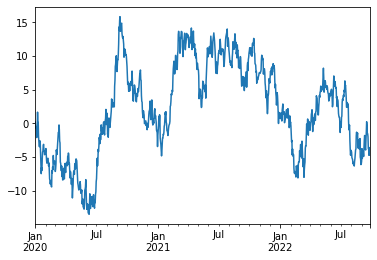

In [76]:
ts = pd.Series(
    np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000)
)
ts.cumsum().plot()

<AxesSubplot:>

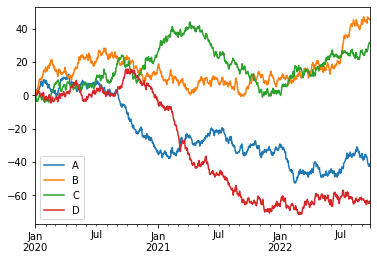

In [77]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df.cumsum().plot()

<AxesSubplot:ylabel='Density'>

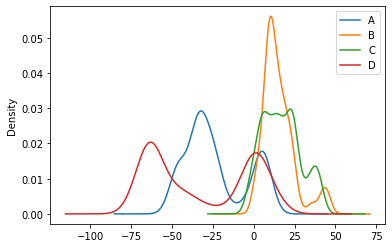

In [78]:
df.cumsum().plot(kind="kde")

# 13. Importing / Exporting Data

### CSV

In [79]:
# Writing to a csv file
df.to_csv("../data/data.csv")

In [80]:
# Reading from a csv file
pd.read_csv("../data/data.csv", index_col=0).head()

,A,B,C,D
2020-01-01,-0.008178,0.281098,0.496296,-0.556110
2020-01-02,0.155612,1.320331,0.853578,1.118942
2020-01-03,-0.548885,0.129874,-2.381957,0.605855
2020-01-04,1.346830,-0.669569,-0.506972,-1.270655
2020-01-05,1.956215,0.609024,-2.045044,0.870882


### Excel

In [81]:
# Writing to an excel file
df.to_excel("../data/data.xlsx", sheet_name="Sheet1")

In [82]:
# Reading from an excel file
pd.read_excel("../data/data.xlsx", sheet_name="Sheet1", index_col=0).head()

,A,B,C,D
2020-01-01,-0.008178,0.281098,0.496296,-0.556110
2020-01-02,0.155612,1.320331,0.853578,1.118942
2020-01-03,-0.548885,0.129874,-2.381957,0.605855
2020-01-04,1.346830,-0.669569,-0.506972,-1.270655
2020-01-05,1.956215,0.609024,-2.045044,0.870882


### HDF5

In [83]:
# Writing to a HDF5 Store
df.to_hdf("../data/data.h5", "df")

In [84]:
# Reading from a HDF5 Store 
pd.read_hdf("../data/data.h5", "df").head()

,A,B,C,D
2020-01-01,-0.008178,0.281098,0.496296,-0.556110
2020-01-02,0.155612,1.320331,0.853578,1.118942
2020-01-03,-0.548885,0.129874,-2.381957,0.605855
2020-01-04,1.346830,-0.669569,-0.506972,-1.270655
2020-01-05,1.956215,0.609024,-2.045044,0.870882
